In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
header = list(range(1, 17))
header = ["letter"] + header

letter_df_complete = pd.read_csv("letter-recognition.data", 
sep = ",", 
names = header)
letter_train = letter_df_complete.head(16000)
letter_test = letter_df_complete.tail(4000)

Try on Letter T

In [3]:
letter_d_let = letter_train[letter_train["letter"] == "D"]
print(letter_d_let)

letter_m_let = letter_train[letter_train["letter"] == "M"]
print(letter_m_let)

letter_f_let = letter_train[letter_train["letter"] == "F"]
print(letter_f_let)

      letter  1   2  3  4  5   6  7   8  9  10  11  12  13  14  15  16
2          D  4  11  6  8  6  10  6   2  6  10   3   7   3   7   3   9
57         D  2   6  3  4  2   6  7  10  8   6   6   6   3   8   3   8
75         D  4   5  5  4  3   7  7   7  7   7   6   5   2   8   3   7
108        D  3   8  4  6  4   7  8   7  6   7   7   5   3   8   3   7
191        D  4  10  6  7  4   8  6   8  7   4   5   3   3   8   4   8
...      ... ..  .. .. .. ..  .. ..  .. ..  ..  ..  ..  ..  ..  ..  ..
15901      D  1   0  1  0  0   6  7   6  5   7   6   6   2   8   2   8
15920      D  4   8  6  6  5   7  7   7  6   6   5   5   3   8   3   7
15966      D  7  10  9  8  8   7  8   6  6   8   7   6   7   8   3   7
15967      D  2   5  4  3  3   9  7   5  6   9   5   5   2   8   3   8
15976      D  4   7  6  5  4   8  7   4  7  11   5   7   3   7   4   8

[638 rows x 17 columns]
      letter   1   2   3  4  5   6  7  8  9  10  11  12  13  14  15  16
9          M  11  15  13  9  7  13  2  6  2  12   1

In [4]:
def inspection(x_data):
    plt.figure()
    sns.displot(x_data, kde = True)
    plt.show()
    plt.figure()
    sns.boxplot(x_data)
    plt.show()

<Figure size 432x288 with 0 Axes>

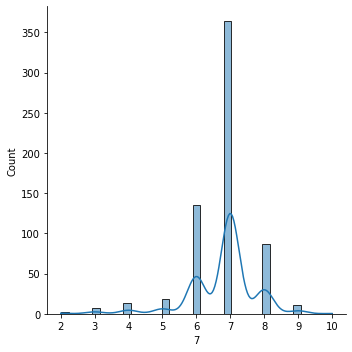

c:\Users\Florentina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


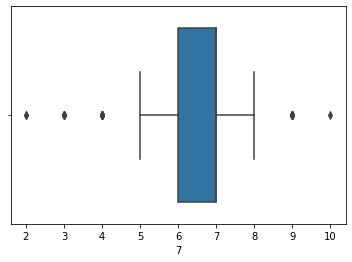

<Figure size 432x288 with 0 Axes>

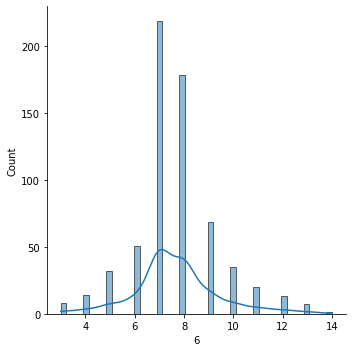

c:\Users\Florentina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


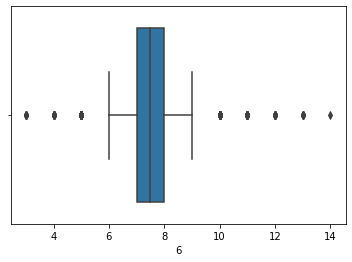

<Figure size 432x288 with 0 Axes>

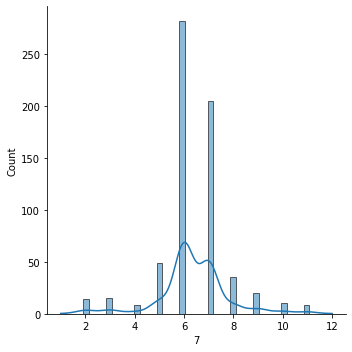

c:\Users\Florentina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


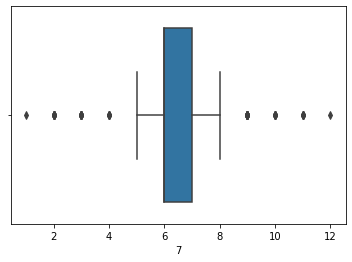

<Figure size 432x288 with 0 Axes>

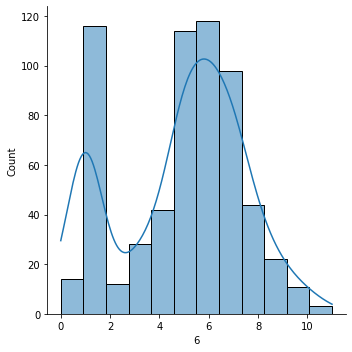

c:\Users\Florentina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


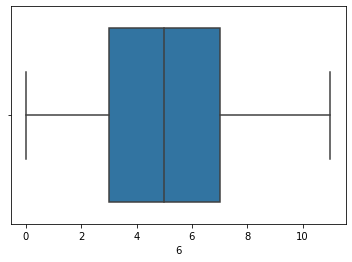

In [6]:
inspection(letter_d_let[7])
inspection(letter_m_let[6])
inspection(letter_m_let[7])
inspection(letter_f_let[6])

In [73]:
from pyod.models.iforest import IForest
from sklearn.model_selection import train_test_split

#Prepare dataset
def prepare_dataset(dataset, letter, test_prob = 0.2, rand_state = 25):
    dataset_letter = dataset[dataset["letter"] == letter]
    dataset_wo_let = dataset_letter.drop('letter', axis = 1)
    letter_train, letter_test = train_test_split(dataset_wo_let, test_size = test_prob, random_state = rand_state)
    return dataset_letter, letter_train, letter_test

#Statistical function to count outliers (https://towardsdatascience.com/use-the-isolated-forest-with-pyod-3818eea68f08)
def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

def isolation_forest(train_data, test_data, cont=0.1, max_feat=1.0, max_samp=40, n_est=100, random_state=0):
    #Create a new iForest
    isft = IForest(behaviour='new', contamination=cont, max_features=max_feat, max_samples=max_samp, n_estimators=n_est)
    #'behaviour': 'new',                    for decision function change to match other anomaly detection algorithm API
    #'bootstrap': False,                    bootstrapping applied or not
    #'contamination': 0.1,          % of outliers in dataset
    #'max_features': 1.0,           number of features from X
    #'max_samples': 40,             number of samples to draw (size of a tree)
    #'n_estimators': 100,           number of trees in ensemble
    #'n_jobs': 1,                           parallel jobs to be done
    #'random_state': None,                  random state
    #'verbose': 0                           verbosity of the tree

    #Fit iForest
    isft.fit(train_data)

    #Training data
    y_train_scores = isft.decision_function(train_data)
    y_train_pred = isft.predict(train_data)

    #Test data
    y_test_scores = isft.decision_function(test_data)
    y_test_pred = isft.predict(test_data)

    #Threshold for defined contamination rate
    print("The threshold for the defined contamination rate:" , isft.threshold_)


    print("The training data:", count_stat(y_train_pred))
    print("The testing data:", count_stat(y_test_pred))
    return isft, y_train_scores, y_test_scores


In [74]:
print("D")
letter_d, d_train, d_test = prepare_dataset(letter_df_complete, "D")
isft_d, d_train_scores, d_test_score = isolation_forest(d_train, d_test)

print("M")
letter_m, m_train, m_test = prepare_dataset(letter_df_complete, "M")
isft_m, m_train_scores, m_test_score = isolation_forest(m_train, m_test)

print("F")
letter_f, f_train, f_test = prepare_dataset(letter_df_complete, "F")
isft_f, f_train_scores, f_test_score = isolation_forest(f_train, f_test)

D
The threshold for the defined contamination rate: -2.6725583551767684e-17
The training data: {0: 579, 1: 65}
The testing data: {0: 145, 1: 16}
M
The threshold for the defined contamination rate: 1.4690939437178585e-17
The training data: {0: 569, 1: 64}
The testing data: {0: 140, 1: 19}
F
The threshold for the defined contamination rate: 1.6361288409164065e-17
The training data: {0: 558, 1: 62}
The testing data: {0: 145, 1: 10}


Variable importance

In [65]:
def var_importance(iso_for, let_train):
    isft_vi = iso_for.feature_importances_
    print(isft_vi)

    from matplotlib import pyplot as plt
    for_plot = pd.DataFrame({'x_axis':let_train.columns,
                'y_axis':isft_vi}).sort_values(by='y_axis',ascending=True)
    for_plot['y_axis'].plot.barh()


[0.07283583 0.07465545 0.07743719 0.05290589 0.0725479  0.0648511
 0.06185649 0.0512468  0.07905031 0.06765784 0.05203696 0.06350246
 0.05918576 0.03811203 0.06619399 0.04592399]


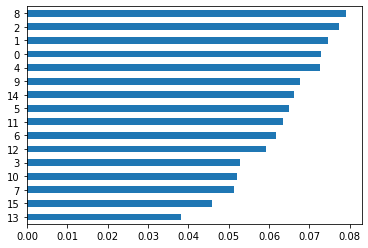

In [70]:
var_importance(isft_d, d_train)

[0.06781606 0.06365373 0.05876489 0.08382385 0.057407   0.05442303
 0.07074104 0.06008044 0.04884184 0.05883345 0.04954217 0.05720128
 0.08035793 0.06105313 0.06475725 0.06270292]


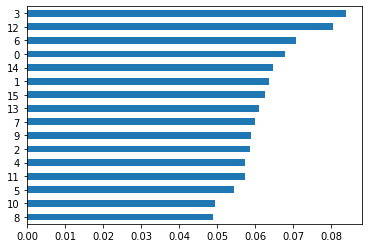

In [71]:
var_importance(isft_m, m_train)

[0.06908773 0.06968698 0.06801128 0.06171309 0.05575539 0.07634928
 0.05431876 0.06682296 0.06353351 0.07422372 0.05730325 0.0615498
 0.06091821 0.04018661 0.06255945 0.05798   ]


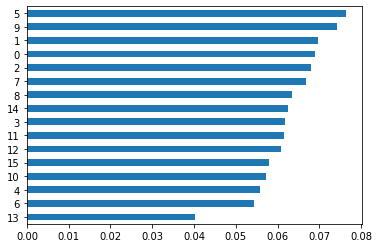

In [72]:
var_importance(isft_f, f_train)

In [81]:
def plot_train_scores(train_dataset_scores):
    plt.hist(train_dataset_scores, bins='auto') # arguments are passed to np.histogram
    plt.title("Outlier score")
    plt.show()

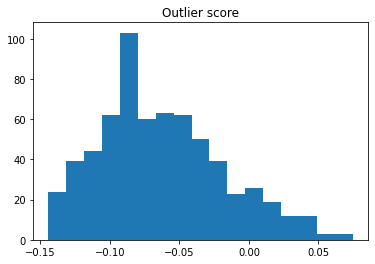

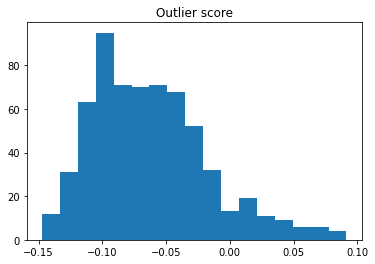

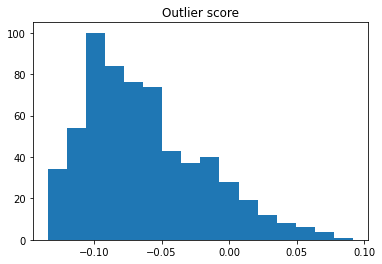

In [82]:
plot_train_scores(d_train_scores)
plot_train_scores(m_train_scores)
plot_train_scores(f_train_scores)

In [83]:
def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

In [91]:
threshold_d = isft_d.threshold_ # Or other value from the above histogram
print("D\n", descriptive_stat_threshold(d_train,d_train_scores, threshold_d))

threshold_m = isft_m.threshold_ # Or other value from the above histogram
print("\nM\n", descriptive_stat_threshold(m_train,m_train_scores, threshold_m))

threshold_f = isft_d.threshold_ # Or other value from the above histogram
print("\nF\n", descriptive_stat_threshold(f_train,f_train_scores, threshold_f))

D
      Group  Count    Count %     1      2     3     4     5     6     7     8  \
0   Normal    579  89.906832  3.82   6.94  5.04  5.21  3.96  7.42  6.92  6.04   
1  Outlier     65  10.093168  6.09  10.17  6.46  6.22  4.88  8.54  5.82  4.71   

      9    10    11    12    13    14    15    16  Anomaly_Score  
0  6.58  7.99  5.22  5.64  3.21  7.85  3.80  7.53          -0.07  
1  5.88  9.49  4.22  6.89  4.86  7.40  5.65  8.26           0.02  

M
      Group  Count    Count %     1      2      3     4     5     6     7  \
0   Normal    569  89.889415  4.47   6.50   6.21  5.08  5.08  7.60  6.36   
1  Outlier     64  10.110585  8.62  10.95  10.36  6.92  7.30  8.16  6.81   

      8     9    10    11    12    13    14    15    16  Anomaly_Score  
0  6.11  3.27  7.48  7.03  8.04  8.00  5.98  2.03  7.52          -0.07  
1  4.59  3.83  7.55  4.64  9.20  9.56  7.36  3.16  7.28           0.03  

F
      Group  Count  Count %     1     2     3     4     5     6      7     8  \
0   Normal    558